# Predicting Seattle Collision Severity Report
Coursera Capstone Project <br>
by Trina Hurdman

## Introduction
While safety features in vehicles and enhanced traffic safety measures continue to evolve, vehicle collisions continue to be an unfortunate reality. These traffic accidents have many impacts on people, property and government agencies such as emergency services and health care. <br>

According to [data compiled by the City of Seattle](http://seattlecollisions.timganter.io/collisions/sd/2019-10-07/ed/2020-10-02/m/0/nelat/47.77256035513371/nelng/-122.21534729003908/swlat/47.43923470537306/swlng/-122.44880676269533), in the past year alone, there were over 7,000 collisions involving over 15,000 people and over 8,000 vehicles. The economic costs of these collisions are significant at over $151 million. <br>

While collisions that result in property damage only are more prevalent, the economic cost of collisions that result in injury are much more significant. For example, in the past year, the 4,150 collisions that resulted in property damage only had an economic cost of 18.7 million US dollars while the 2,169 collisions that resulted in injury had an economic cost of 60.3 million US dollars. Serious injuries and fatalities have an even higher economic cost per collision.

The City of Seattle and Seattle health care agencies all have a vested interest in predicting the severity of collisions in order to inform their planning, budgeting and ultimately reduce the economic costs of collisions. Knowing which attributes are most relevant in determining severity and which machine learning model will provide the most accurate prediction of collision severity would be very helpful to these organizations.

## Data
The City of Seattle has made data collected around collisions since 2004 [publicly available](https://data-seattlecitygis.opendata.arcgis.com/datasets/collisions) in keeping with government open data practices. While the City of Seattle classifies severity into five different categories, Coursera has used the data and divided the severity into two categories of for prediction purposes. These are injury and property damage only. The data is located in a CSV file that can be found [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv). <br>

The dataset includes details about 194,673 collisions where there was either property damage only or injury. It includes the following target and attributes:
- **SEVERITYCODE:** This is the target variable where 1 is property damage and 2 is injury
- **X:** Lattitude coordinates
- **Y:** Longitute coordinates
- **OBJECTID:** Unique identifier
- **INCKEY:** Unique key
- **COLDETKEY:** Secondary key
- **REPORTNO:** Report number
- **STATUS:** Matched or unmatched
- **ADDRTYPE:** Address type - Alley, Block or Intersection
- **INTKEY:** Intersection key
- **LOCATION:** Description of the location of the collision
- **EXCEPTRSNCODE:** Undefined
- **EXCEPTRSNDESC:** Undefined
- **SEVERITYCODE.1:** Same as "SEVERITYCODE" above
- **SEVERITYDESC:** Description of severity
- **COLLISIONTYPE:** Collision type
- **PERSONCOUNT:** Total number of people involved
- **PEDCOUNT:** Total number of pedestrians involved
- **PEDCYLCOUNT:** Total number of bicycles involved
- **VEHCOUNT:** Total number of vehicles involved
- **INCDATE:** Date of the collision
- **INCDTTM:** Date and time of the collision
- **JUNCTIONTYPE:** Category of junction where the collision took place
- **SDOT_COLCODE:** State Department of Transportation collision code
- **SDOT_COLDESC:** State Department of Transportation collision description
- **INATTENTIONIND:** Whether the collision was due to inattention
- **UNDERINFL:** Whether a driver was under the influence of alcohol or drugs
- **WEATHER:** Description of weather conditions
- **ROADCOND:** Condition of the road
- **LIGHTCOND:** Light conditions
- **PEDROWNOTGRNT:** Whether or not the pedestrian right of way was granted
- **SDOTCOLNUM:** State Department of Transportation collision number
- **SPEEDING:** Whether speeding was a factor in the collision
- **ST_COLCODE:** Collision code provided by the state from 0 to 84
- **ST_COLDESC:** Description of the state collision code
- **SEGLANEKEY:** A key for the lane segment
- **CROSSWALKKEY:** A key for the crosswalk
- **HITPARKEDCAR:** Whether the collision involved hitting a parked car

### Examining the dataset
From the description of each of the 38 attributes above, there are obviously many which will not be helpful in predicting collision severity. The dataset was examined in more detail in order to determine which attributes would be helpful in a machine learning model.<br><br>
The dataset contained many columns with large numbers of missing values. However, before deciding what to do about those missing values, it would be helpful to know whether those values are needed at all. For example, while the intersection key had 129,603 missing variables, unique identifiers, such as keys, would not be a valuable in binary classification model as they couldn't be binned into a smaller number of categories.<br><br>
In looking at the data types, the majority of the attributes were objects. Again, before converting attributes into integers for classification purposes, it would be helpful to do some preliminary analysis to see if the attribute itself would be helpful in a classification model.

### Removing unneeded attributes
There are obviously some attributes that will not be helpful to predict collision severity using a classification model. These attributes include unique identifiers or keys, descriptive information or information that is too specific as well as redundant columns. The following columns were dropped before further examination of the rest of the attributes. 
- OBJECTID
- INCKEY
- COLDETKEY
- REPORTNO
- SDOTCOLNUM
- INTKEY
- SEGLANEKEY
- CROSSWALKKEY
- X
- Y
- STATUS
- LOCATION
- SEVERITYCODE.1
- INCDATE
- SDOT_COLCODE
- SDOT_COLDESC
- ST_COLCODE
- ST_COLDESC
- EXCEPTRSNCODE
- EXCEPTRSNDESC

This left 17 attributes along with our target variable for further examination.

## Methodology
### Exploratory Data Analysis
Each remaining attribute was examined to look for trends, patterns, skewed information and correlation. This was done with the understanding that the purpose is to determine which attributes would be best to use in predicting collision severity.<br><br>
**Collision Severity**<br>
The first variable to be examined was collision severity where a 2 in the column "SEVERITY CODE" corresponds to "Injury Collision" in the "SEVERITYDESC" column and 1 corresponds to "Property Damage Only." Around 70% or a little more than two-thirds of the collisions in the dataset are property damage only. This means that we would expect, on average, that collisions with property damage only would be a little more than double those with injury collisions. As we examine our attributes, this needs to be kept in mind to look for instances where this ratio is uneven. This could indicate an attribute that would be helpful in determining severity.<br><br>
**Relationship between Address Type and Collision Severity**<br>
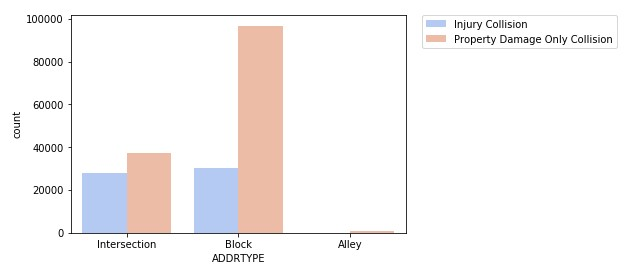
Given the obvious differences in proportions of severity at intersections versus blocks, it appears that Address Type would be good attributes to use in predicting collision severity.

**Relationship between Collision Type and Collision Severity**<br>

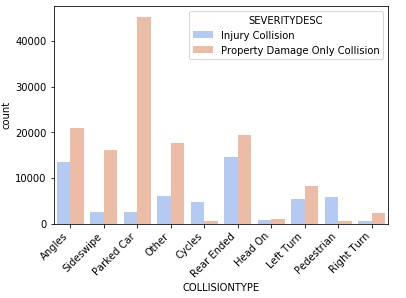

In looking at the graph above, it is evident that the type of collision impacts the severity. While some collisions, such as those involving a parked car are very prevalent, they usually only result in property damage. However, collisions involving pedestrians or rear ended collisions are far more likely to result in injury. Thus, these attributes would also be helpful in our model.

Let's also convert the date and time column of the dataset from an object type to a datetime format that can be used for analysis.

**Relationship between Collision Severity and Junction Type**<br>
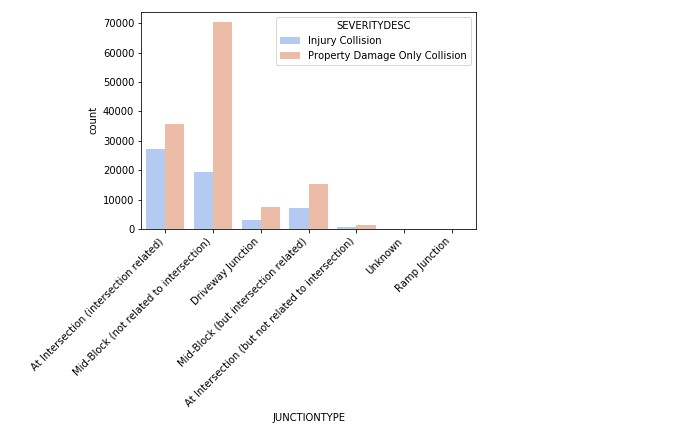
Of the two most prevalent junction types, intersections and mid-block, it is again evident that this impacts severity as there is much more likely to be an injury at an intersection versus mid-block. However, this information appears to be redundant as the attribute address type already provided us with this information. Therefor, this attribute will not be used in the classification model.

**Number of people, pedestrians, bicycles and vehicles**<br>
As these are all continuous variable integers, their range and distribution were examined.
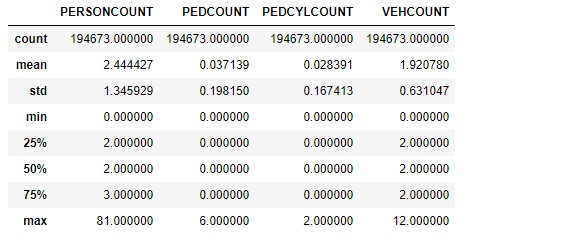
There are evidently some outliers in the dataset given the difference between the maximum number and the 75% number. The vast majority of collisions seem to involve 2-3 people and 2 vehicles without much variation. As the collision type attribute already identifies if there was a pedestrian or bicycle involved, these attributes do not seem to add much information and will not be used in the model.

**Relationship between Collision Severity and Month**<br>
To examine month, day of the week and time of day, the Incident date and time column had to be converted to standard date time format for analysis.
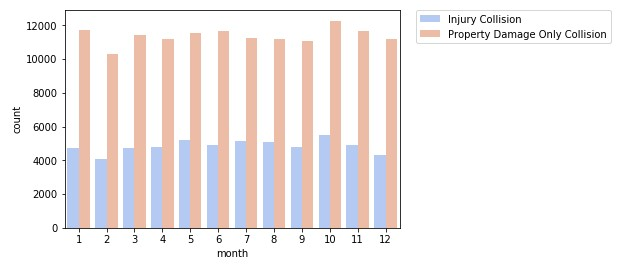
While there might be a slight trend of a higher proportion of collisions in winter time being slightly more likely to result in property damage than injury, for the most part, the severity doesn't seem to be impacted significantly by the time of year. In other words, while the number of collisions may rise and fall, the proportion of injury collisions to property damage only collisions does not seem to be affected. Thus, this does not seem like an effective attribute to use in the model.

**Relationship between Collision Severity and Day of the Week**
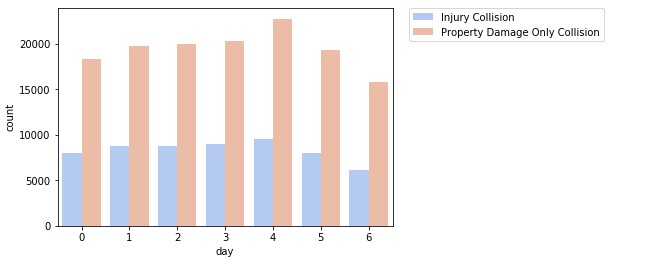
Similar to month of the year, the day of the week does not seem to have much impact on severity and will not be used in the model.

**Relationship between Collision Severity and Time of Day**<br>
Given many instances where the time of day was not recorded and become simply time 0, this skewed the data, so times of 0 were dropped in the graph below.
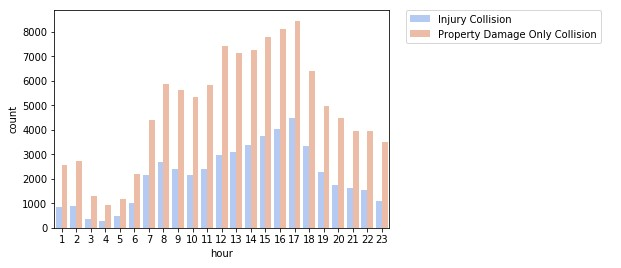
While time of day obviously has an impact on the number of collisions occuring, it is more difficult to determine the impact on collision severity. It seems like there might be slightly less chance of injury from 7pm to 5am, but there doesn't appear to be enough of a difference to make this attribute useful in our model.

**Relationship between Collision Severity and Driver Inattention**<br>
Inattention has many blank entries as it is probably only recorded when the cause of accident was thought to be driver inattention. The graph below represents the collisions were driver innattention was a factor in the collision.
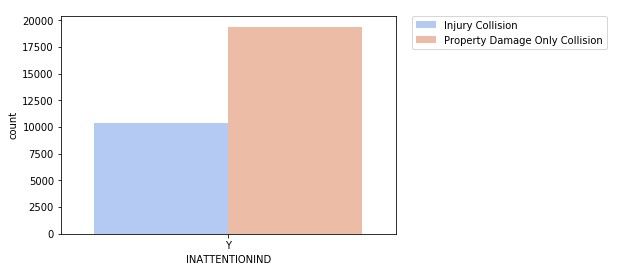
It is surprising that the ratio for the severity does not seem to be affected by driver inattention, making this an unsuitable attribute for the model as well.

**Relationship between Collision Severity and being Under the influence of drugs or alcohol**<br>
While the reporting format was inconsistent for this attribute, it is evident that there are very few cases involving being under the influence of drugs or alcohol.
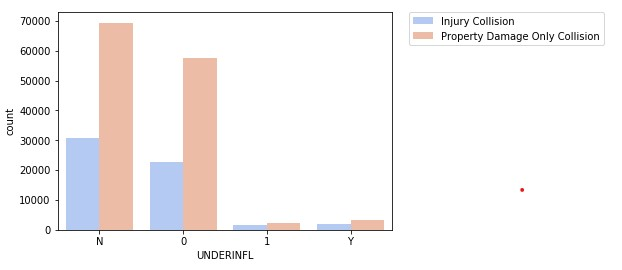
Again, surprisingly, for the cases that are recorded as a driver being under the influence, it does not appear to impact severity and thus will not be used as an attribute in the model.

**Relationship between Collision Severity and the Weather**<br>
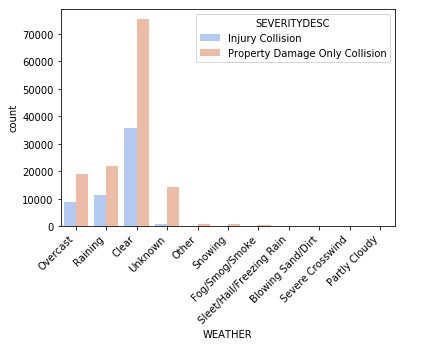
The only category under weather that appears to have an impact on collision severity is "Unknown" so weather will not be used as an attribute for the model.

**Relationship between Collision Severity and the Road Condition**
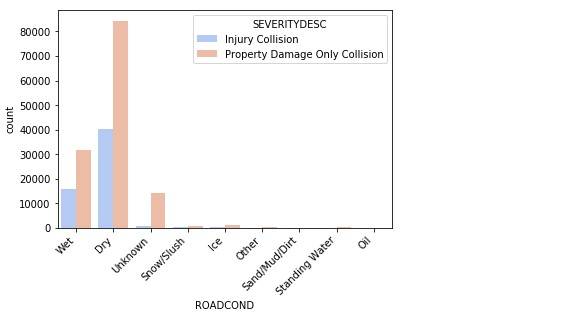
Similar to weather, the only category that seems to have an impact on severity is "Unknown" which makes sense as the weather usually determines the road conditions, so road condition will also not be used in the model.

**Relationship between Collision Severity and Light Conditions**
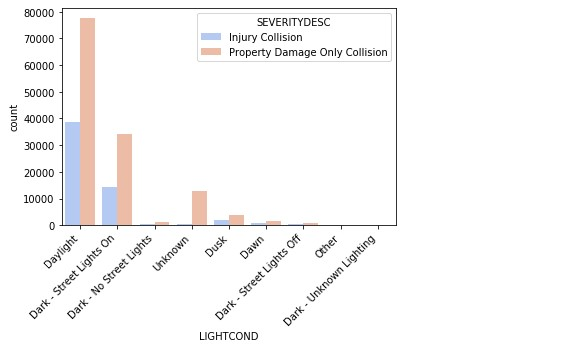
Again, like weather and road conditions, the only category that appears to affect collision severity is "Unknown", so this attribute is not used in the model.

**Relationship between Collision Severity and Pedestrian Right of Way Not Granted**
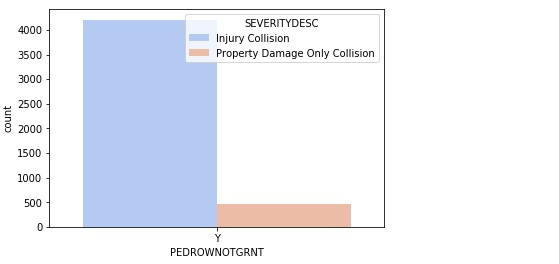
While the number of collisions where the pedestrian right of way was not granted is very small, it is evident that if this does occur, there is a strong effect on severity, with a much higher likelihood of injury. Therefor, this attribute will be used in the model.

**Relationship between Collision Severity and Speeding**
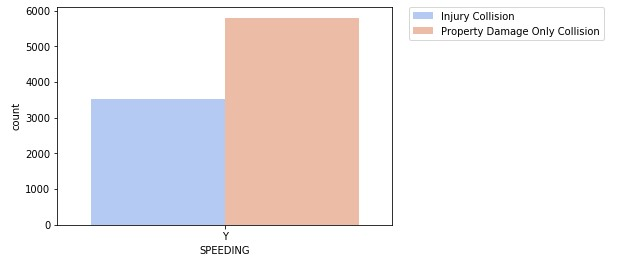
While there are a minority of instances where speeding was a factor in the collision, it does appear to modestly impact severity with speeding being more likely to result in injury than the average collision. Thus, this factor will be used in the model.

**Relationship between Collision Severity and Hitting a Parked Car**
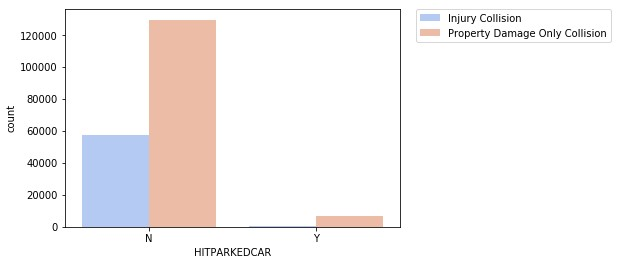
While it is clear that hitting a parked car does impact severity, this attribute is already part of the collision type attribute and using this additional attribute in the model would be redundant. This brings us to the end of our attribute list.

**Final attribute list to be used in machine learning model**<br>
While many of the attributes examined would be useful in determining the likelihood (i.e. number) of collisions based on time, place, or environmental conditions, fewer attributes seem to impact collision severity. The following attributes and associated categories have been determined to have an impact on collision severity and will be used in various machine learning models to determine which one is best at predicting collision severity.
- Address Type: Block, Intersection
- Collision Type: Angles, Sideswipe, Parked Car, Other, Cycles, Rear Ended, Head On, Left Turn, Pedestrian, Right Turn
- Pedestrian Right of Way Not Granted
- Speeding

### Pre-processing of the Featured Data
Within the chosen attribute columns, there are blank entries that need to be addressed. We also need to convert all categorical features to numerical values and balance the dataset.

For the attributes "Address Type" and "Collision Type" there are very few blank entries as a percentage of the overall dataset, so these rows will simply be eliminated. While there are many blank entries for "Pedestrian Right of Way Not Granted" and "Speeding", this is because it is only noted when it is a factor. Thus all the blank entries can assumed to be "N" as opposed to the entered "Y". The categorical values "N" and "Y" are also replaced by numerical values "0" and "1" for classification purposes.

One hot encoding was used to convert all the categorical values in "Address Type" and "Collision Type" to binary variables and then they were concatenated to the dataframe. 

**Balance target data**<br>
There are far more collisions that result in property damage than in injury. Thus, when the classification model is trained, it will be biased. As our dataset is so large, we can correct this by undersampling. Undersampling will randomly delete some of the rows from the property damage only observations so that we will have equal numbers of property damage and injury observations.

### Predictive Classification Modeling
The dataset was split into training and testing sets to build an accurate machine learning model. The following classification algorithms were trained and tested:
- K Nearest Neighbout(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

**K Nearest Neighbor(KNN)**<br>
In KNN classification, the collision is classified as resulting in injury or property damage only by it being classified by what is most common amoung its *k* nearest neighbours. The KNN algorithm was looped in order to determine the most accurate value of *k* to use. Values of KNN accuracy using different values of *k* ranged from 0.63 to 0.70. It was found that *k*=11 had the highest accuracy.

**Decision Tree**<br>
In decision trees, each attribute is a branch with the target classification being the final output. As there were four attributes (each with multiple categories), the max depth of the decision tree was limited to 4.

**Support Vector Machine**<br>
Support Vector Machine is a supervised learning model that is very useful in binary classification models. Support vector machine uses a set of hyperplanes to separate the two target variables (injury and property damage only) as far apart as possible in order to determine where new collisions would fall and thus predict where new collisions would be classified. The "linear", "poly", "rbf", and "sigmoid" kernels were all tested in order to determine which would provide the most accurate classification. While they were all very similar with accuracy scores of between 0.696 and 0.699, the "rbf" kernel produced the most accurate model and was used to train the model.

**Logistic Regression**<br>
Logistic regression calculates the probability of the collision resulting in injury and then classifies those with a higher probability as being an injury collision and the others as being property damage only. 

## Results
Each model was evaluated to determine the Jaccard similarity score and F1 score. The Jaccard similarity score measures the similarity between the training and test sets. The closer to 1.0, the better the similarity. The F1 score is the weighted average of the precision and recall and also has a best value of 1.0.

The following is a table of the evaluation results of each model.

| Classification Model | Jaccard Score | F1 Score |
| :-- | :-: | :-: |
| K Nearest Neighbour | 0.70 | 0.70 |
| Decision Tree | 0.68 | 0.67 |
| Support Vector Machine | 0.70 | 0.70 |
| Logistic Regression | 0.70 | 0.70 |

## Discussion
The classification models K Nearest Neighbour, Support Vector Machine and Logistic Regression all had the same Jaccard similarity scores and F1 scores of 0.70 while the decision tree model had lower scores. However, while those three models resulted in the same scores, the processing time required to compute each of those models varied drastically. Support Vector Machine was very processing time intensive, followed by K Nearest Neighbour. Logistic regression and decision tree on the other hand, can be processed almost instantaneously. It is for this reason that I would recommend to the city of Seattle that they use the logistic regression model in order to predict whether a collision will result in injury or property damage only.

## Conclusion
The City of Seattle and Seattle health care agencies all have a vested interest in predicting the severity of collisions in order to inform their planning, budgeting and ultimately reduce the economic costs of collisions. Through this study, attributes that were most likely to influence collision severity were identified and it was determined that a logistic regression model would be the fastest and most accurate model to predict collision severity. However, in order to improve the effectiveness of the model, the city of Seattle might consider adding additional data that influences severity. For example, I would anticipate that the type of roadway itself would also influence severity. A collision in a low speed residential sidestreet would probably be less likely to cause injury than one a high speed expressway. This is different from speeding which only tells you whether or not the driver exceeding the speed limit was a factor in the collision. Additional attributes could add significant value to the model by improving accuracy and precision.